<h1> <center>Data Integration & Visualization </center></h1>
                                        

# ![title](airplaneimage.jpg)

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [18]:
airlinesDf = pd.read_csv("airlines.csv")

In [19]:
airportsDf = pd.read_csv("airports.csv")

In [20]:
flightsDf= pd.read_csv("flights.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18940\17542411.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flightsDf= pd.read_csv("flights.csv")


<h2>Data Integration </h2> 
<h5>First we will merge flights table with the airlines table on column Airline from flights and column IATA from airlines</h5>

In [21]:
tempmerge = pd.merge(flightsDf,airlinesDf, left_on= 'AIRLINE',right_on='IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Origin Airport from tempmerge and IATA from airpot</h5>

In [22]:
tempmerge2 = pd.merge(tempmerge,airportsDf,left_on='ORIGIN_AIRPORT',right_on= 'IATA_CODE')

<h5>Then we will merge the output table with the airports table on the common column Destination Airport from tempmerge2 and IATA from airpot</h5>

In [23]:
df = pd.merge(tempmerge2,airportsDf,left_on='DESTINATION_AIRPORT',right_on= 'IATA_CODE')

<h2>Data Cleaning</h2>

<h4>First we will rename some of the columns to make it easier for us to read</h4>

In [24]:
df.rename(columns={'CITY_x': 'ORIGIN_CITY','AIRLINE_x':'AIRLINE','STATE_x':'ORIGIN_STATE',
'LATITUDE_x':'ORIGIN_LATITUDE','LONGITUDE_x':'ORIGIN_LONGITUDE','CITY_y': 'DESTINATION_CITY',
'STATE_y':'DESTINATION_STATE','LATITUDE_y':'DESTINATION_LATITUDE',
'LONGITUDE_y':'DESTINATION_LONGITUDE'},inplace=True)

<h4>The first feature that we are going to add is the date column we will use the values in the day,month,and year columns and combine them in a single column and later we will drop them</h4>

In [25]:
df["DATE"] = df['YEAR'].astype(str) +"-"+ df["MONTH"].astype(str) + "-" + df['DAY'].astype(str)

In [26]:
df['DATE'] = pd.to_datetime(df['DATE'])

<h4>First we will drop unused columns and the columns that has many null values</h4>

In [27]:
df.drop(['DAY','MONTH','YEAR','DAY_OF_WEEK','IATA_CODE_x','TAIL_NUMBER','IATA_CODE_y','IATA_CODE','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY',
'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_y','AIRPORT_x','AIRPORT_y','COUNTRY_y','COUNTRY_x'],axis=1,inplace=True)

<h4>Now we will drop any row that has any null values</h4>

In [28]:
df = df.dropna(thresh=29)

<h4>The Second feature is the speed of the aircraft we used the distance column and the air time column to calculate the speed of the aircraft</h4>

In [29]:
df["AIRCRAFT_SPEED"] = df['DISTANCE'] / df["AIR_TIME"]

In [30]:
df.shape

(5222000, 30)

In [32]:
df.columns

Index(['AIRLINE', 'FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'ORIGIN_CITY', 'ORIGIN_STATE',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DESTINATION_CITY',
       'DESTINATION_STATE', 'DESTINATION_LATITUDE', 'DESTINATION_LONGITUDE',
       'DATE', 'AIRCRAFT_SPEED'],
      dtype='object')

<h4>Now we will search for outliers </h4>

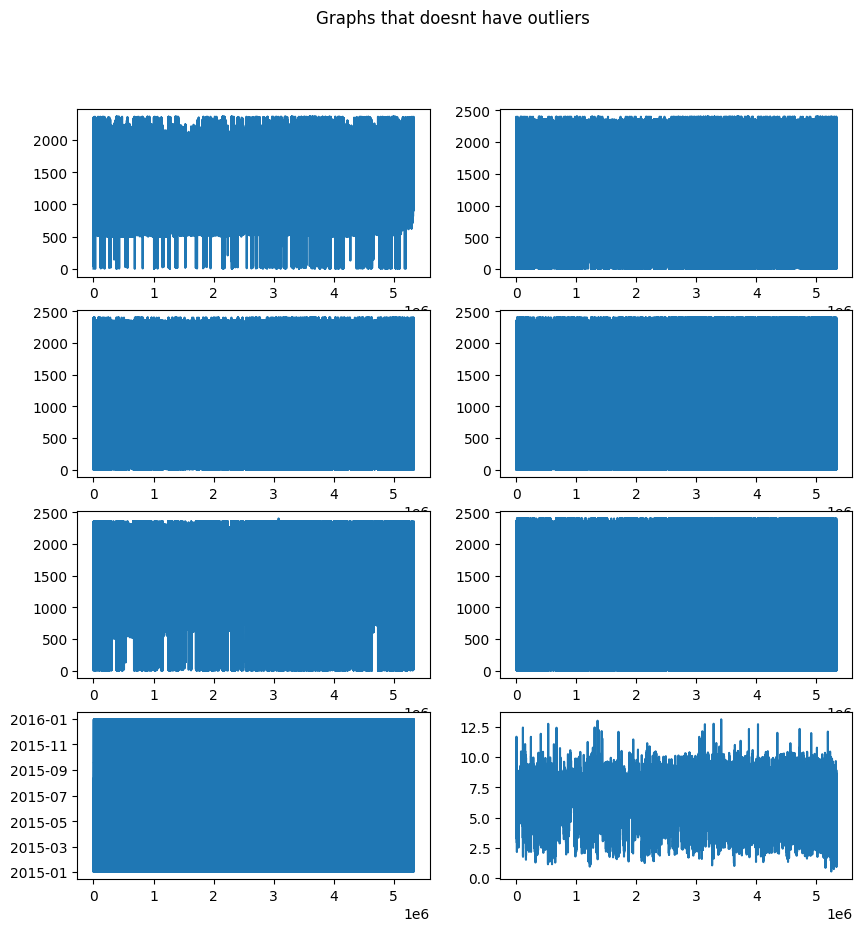

In [70]:
fig, axs = plt.subplots(4,2)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle('Graphs that doesnt have outliers')
axs[0][0].plot(df['SCHEDULED_DEPARTURE'])
axs[0][1].plot(df['DEPARTURE_TIME'])
axs[1][0].plot(df['WHEELS_OFF'])
axs[1][1].plot(df['WHEELS_ON'])
axs[2][0].plot(df['SCHEDULED_ARRIVAL'])
axs[2][1].plot(df['ARRIVAL_TIME'])
axs[3][0].plot(df['DATE'])
axs[3][1].plot(df['AIRCRAFT_SPEED'])


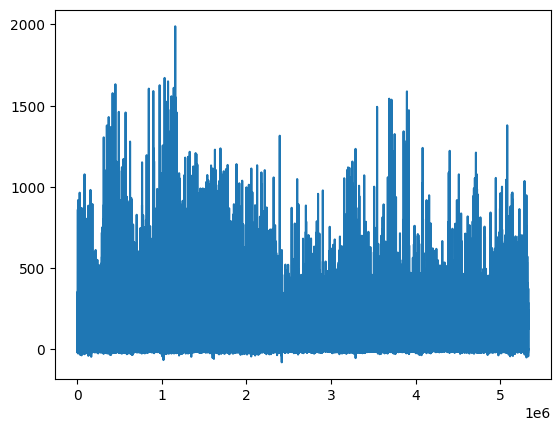

In [37]:
plt.plot(df['DEPARTURE_DELAY']) #remove all values above 1700

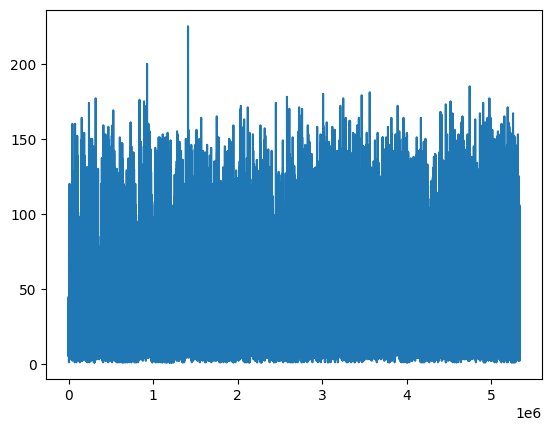

In [38]:
plt.plot(df['TAXI_OUT']) # remove upto 180

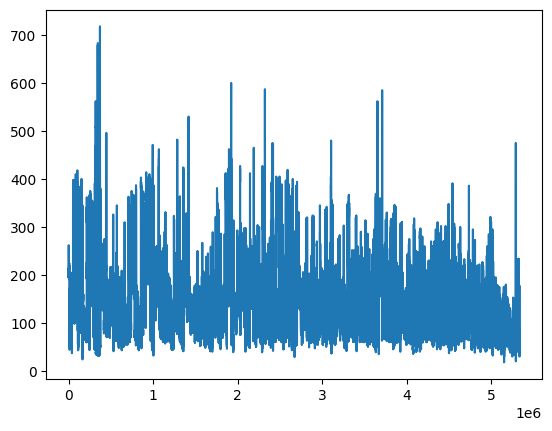

In [40]:
plt.plot(df['SCHEDULED_TIME'])# remove any above 500

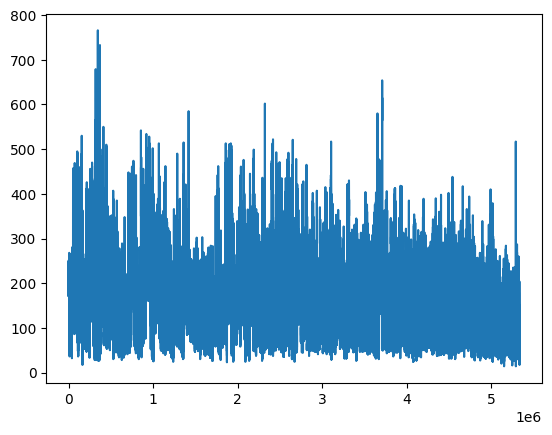

In [41]:
plt.plot(df['ELAPSED_TIME'])# maybe 

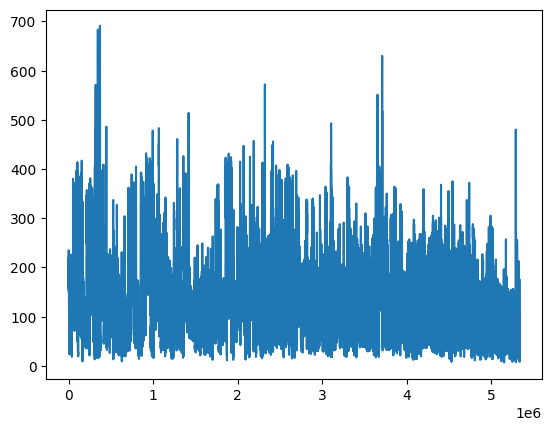

In [42]:
plt.plot(df['AIR_TIME'])#maybe

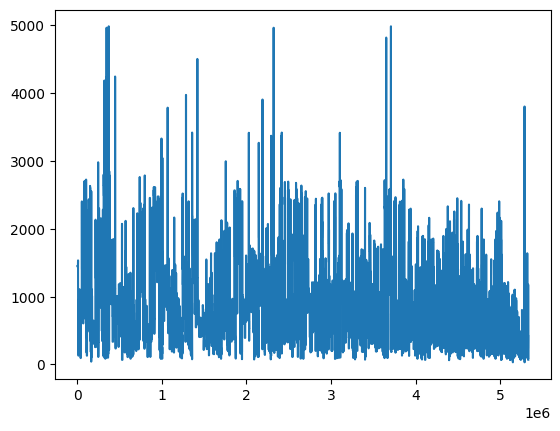

In [43]:
plt.plot(df['DISTANCE'])# 4.5 to 4k remove

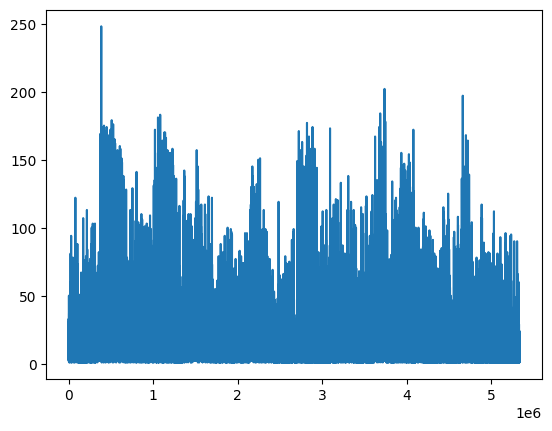

In [45]:
plt.plot(df['TAXI_IN'])# remove above 200

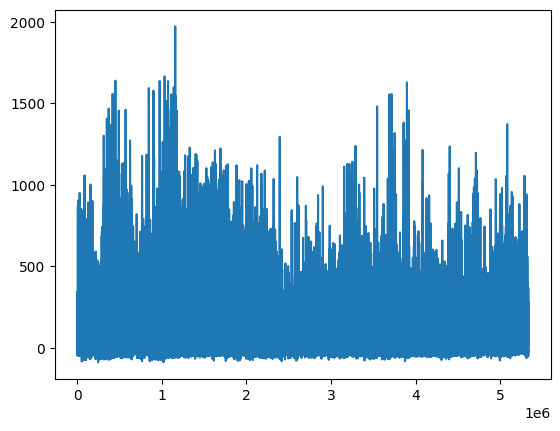

In [48]:
plt.plot(df['ARRIVAL_DELAY'])#1700